✅ Data Loaded & Cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       1296 non-null   float64
 1   Surface_Area               1296 non-null   float64
 2   Wall_Area                  1296 non-null   float64
 3   Roof_Area                  1296 non-null   float64
 4   Overall_Height             1296 non-null   float64
 5   Orientation                1296 non-null   float64
 6   Glazing_Area               1296 non-null   float64
 7   Glazing_Area_Distribution  1296 non-null   float64
 8   Heating_Load               1296 non-null   float64
 9   Cooling_Load               1296 non-null   float64
dtypes: float64(10)
memory usage: 101.4 KB
None

Missing values per column:
 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                 

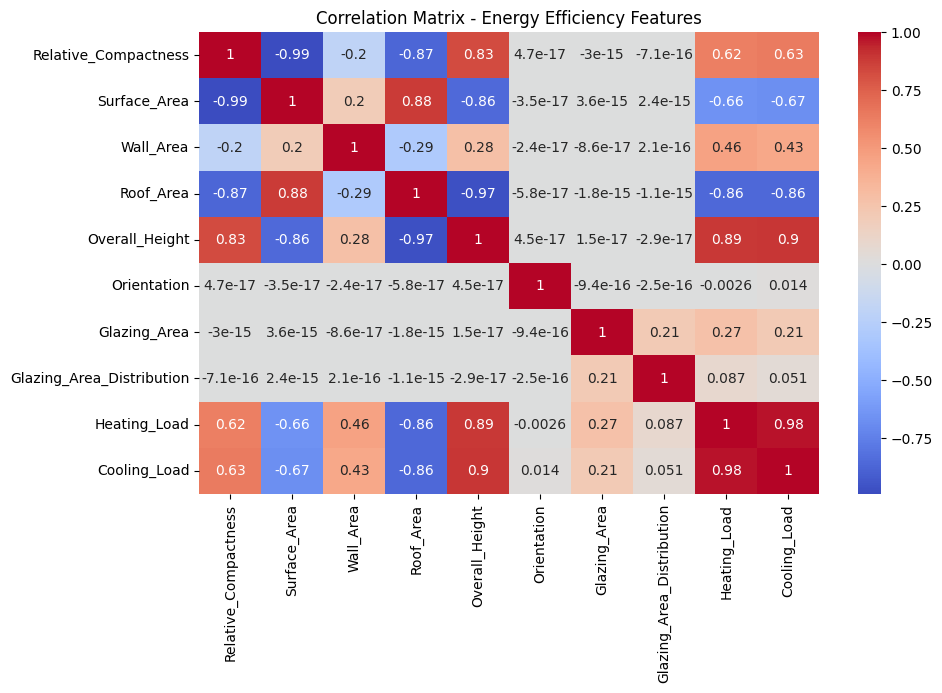


🔥 Heating Load Model → R²: 0.924, RMSE: 2.187
❄️ Cooling Load Model → R²: 0.907, RMSE: 2.237

Sample comparison:
   Actual_Heating  Predicted_Heating  Actual_Cooling  Predicted_Cooling
0        40.47000          39.863865        40.47000          40.232193
1        29.90000          29.387762        29.90000          31.862755
2        16.62000          14.532599        16.62000          16.598271
3        24.58776          22.272982        24.58776          24.576320
4        24.58776          22.272982        24.58776          24.576320


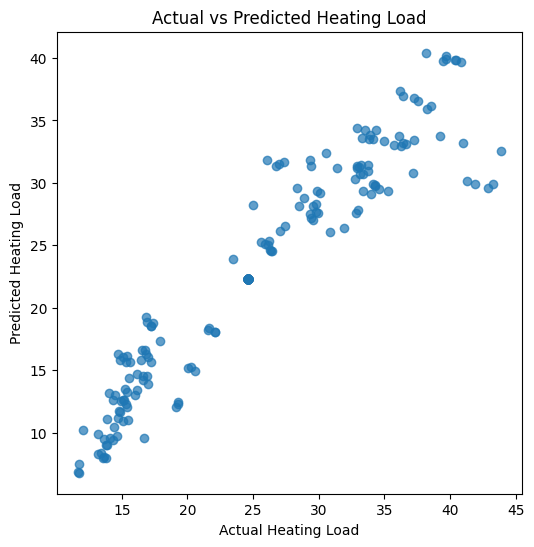

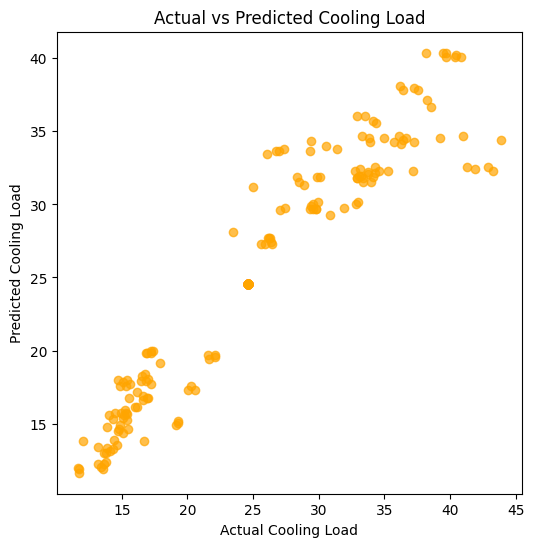

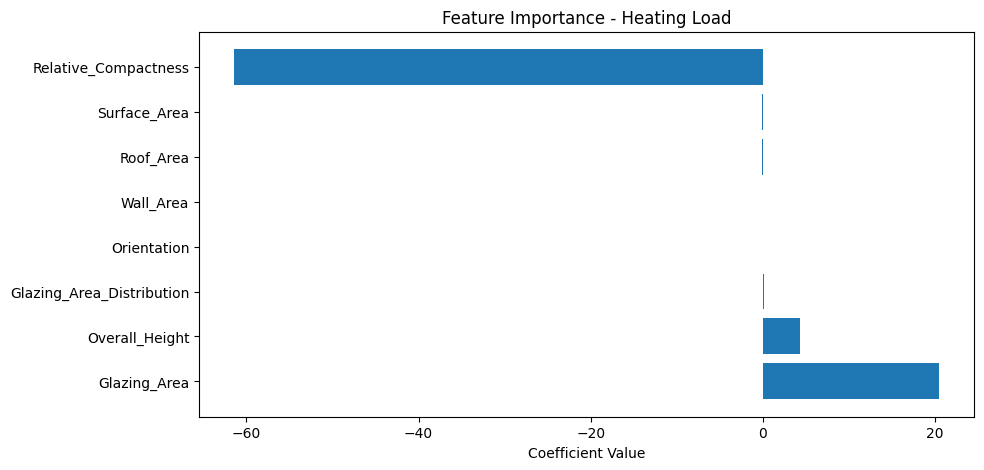


✅ Exported Files for Power BI:
1️⃣ cleaned_energy_efficiency.csv
2️⃣ energy_predictions.csv
3️⃣ feature_importance.csv


In [4]:
# ----------------------------------------------
# Advanced Predictive Analysis for Energy Efficiency
# (Clean + Predict + Export for Power BI)
# ----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- Step 1: Load dataset ---
url = "ENB2012_data.csv"  # path to your CSV file
df = pd.read_csv(url)

# --- Step 2: Rename columns for clarity ---
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area',
    'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'
]

# --- Step 3: Clean the dataset ---
# Convert any text placeholders like '?' to NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (if needed)
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values automatically
df = df.fillna(df.mean(numeric_only=True))

# Check dataset shape and nulls
print("✅ Data Loaded & Cleaned:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# --- Step 4: Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Energy Efficiency Features')
plt.show()

# --- Step 5: Define features and targets ---
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]

# --- Heating Load Model ---
y_heat = df['Heating_Load']
X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)

model_heat = LinearRegression()
model_heat.fit(X_train, y_train)
y_pred_heat = model_heat.predict(X_test)

r2_heat = r2_score(y_test, y_pred_heat)
rmse_heat = np.sqrt(mean_squared_error(y_test, y_pred_heat))
print(f"\n🔥 Heating Load Model → R²: {r2_heat:.3f}, RMSE: {rmse_heat:.3f}")

# --- Cooling Load Model ---
y_cool = df['Cooling_Load']
X_train, X_test, y_train, y_test = train_test_split(X, y_cool, test_size=0.2, random_state=42)

model_cool = LinearRegression()
model_cool.fit(X_train, y_train)
y_pred_cool = model_cool.predict(X_test)

r2_cool = r2_score(y_test, y_pred_cool)
rmse_cool = np.sqrt(mean_squared_error(y_test, y_pred_cool))
print(f"❄️ Cooling Load Model → R²: {r2_cool:.3f}, RMSE: {rmse_cool:.3f}")

# --- Step 6: Create comparison DataFrame ---
comparison = pd.DataFrame({
    'Actual_Heating': y_test.values,
    'Predicted_Heating': y_pred_heat[:len(y_test)],
    'Actual_Cooling': y_test.values,
    'Predicted_Cooling': y_pred_cool[:len(y_test)]
})
print("\nSample comparison:")
print(comparison.head())

# --- Step 7: Visualize Predictions ---
plt.figure(figsize=(6,6))
plt.scatter(comparison['Actual_Heating'], comparison['Predicted_Heating'], alpha=0.7)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load')
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(comparison['Actual_Cooling'], comparison['Predicted_Cooling'], alpha=0.7, color='orange')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Actual vs Predicted Cooling Load')
plt.show()

# --- Step 8: Feature Importance ---
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient_Heating': model_heat.coef_,
    'Coefficient_Cooling': model_cool.coef_
}).sort_values(by='Coefficient_Heating', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(importance['Feature'], importance['Coefficient_Heating'])
plt.title('Feature Importance - Heating Load')
plt.xlabel('Coefficient Value')
plt.show()

# --- Step 9: Export cleaned data for Power BI ---
df.to_csv('cleaned_energy_efficiency.csv', index=False)
comparison.to_csv('energy_predictions.csv', index=False)
importance.to_csv('feature_importance.csv', index=False)

print("\n✅ Exported Files for Power BI:")
print("1️⃣ cleaned_energy_efficiency.csv")
print("2️⃣ energy_predictions.csv")
print("3️⃣ feature_importance.csv")
